<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Random Forest

## Introducción
El modelo Random Forest es un algoritmo de aprendizaje automático que se utiliza para tareas de clasificación y regresión. Su principal ventaja es la mejora en la precisión y la robustez en comparación con un único árbol de decisión. Esto se logra mediante la combinación de múltiples árboles de decisión, que se construyen a partir de diferentes subconjuntos de los datos.

## Relación con los Modelos de Árboles de Decisión
Los árboles de decisión son modelos simples que dividen los datos en nodos, tomando decisiones basadas en las características de los datos. Sin embargo, estos modelos pueden ser propensos al sobreajuste, donde aprenden patrones demasiado específicos de los datos de entrenamiento, lo que afecta su generalización a nuevos datos.

El modelo Random Forest utiliza un enfoque de conjunto, donde se generan múltiples árboles de decisión y se combinan sus predicciones. La predicción final es determinada mediante la votación (en clasificación) o el promedio (en regresión) de las predicciones de todos los árboles en el bosque.

## Base Matemática
El proceso de construcción de un modelo Random Forest se basa en dos conceptos clave:

- **Submuestreo Aleatorio**: Al construir cada árbol, se seleccionan aleatoriamente diferentes subconjuntos de datos a partir del conjunto de entrenamiento (con reemplazo). Esto se conoce como *Bootstrap Aggregating* (Bagging).

- **Selección Aleatoria de Características**: En cada nodo del árbol, se selecciona aleatoriamente un subconjunto de características del conjunto total. Esto asegura que los árboles sean diferentes entre sí y ayuda a reducir la correlación entre ellos.

Matemáticamente, si tenemos un conjunto de datos \(D\) con \(N\) instancias y \(M\) características, y deseamos construir un bosque de \(B\) árboles de decisión, el algoritmo sigue estos pasos:

1. Para \(b = 1, 2, \ldots, B\):
   - Seleccionar \(N^*\) instancias al azar con reemplazo del conjunto de datos \(D\).
   - Para cada nodo en el árbol, seleccionar \(m << M\) características al azar.
   - Dividir el nodo usando la mejor característica seleccionada.

2. Realizar votación entre los árboles (en clasificación) o promediar (en regresión) para obtener la predicción final.

## Ejemplo
Imaginemos un conjunto de datos que contiene información sobre diferentes pacientes, incluyendo características como edad, índice de masa corporal (IMC) y niveles de colesterol, y queremos predecir si un paciente tiene riesgo de enfermedad cardíaca (sí/no).

Si utilizamos un árbol de decisión único, podría generar clasificaciones que se ajusten muy bien a los datos de entrenamiento. Sin embargo, si probamos un Random Forest, el modelo utilizará diferentes subconjuntos de los datos y diferentes características para construir múltiples árboles.

Por ejemplo:
- El primer árbol puede decidir divisiones basadas en el IMC y la edad.
- El segundo árbol puede enfocarse en niveles de colesterol y edad.
- El tercer árbol puede usar IMC y colesterol.

Al final, cada árbol votará sobre el riesgo de enfermedad cardíaca, y el resultado final se obtiene tomando el voto mayoritario. Esta técnica ayuda a reducir el sobreajuste y a mejorar la precisión del modelo.

## Conclusión
El modelo Random Forest es un poderoso método de aprendizaje automático que mejora la precisión y la robustez de las predicciones al combinar múltiples árboles de decisión. Su enfoque de submuestreo aleatorio y selección aleatoria de características lo convierte en una herramienta eficaz para manejar problemas complejos y prevenir el sobreajuste.

Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



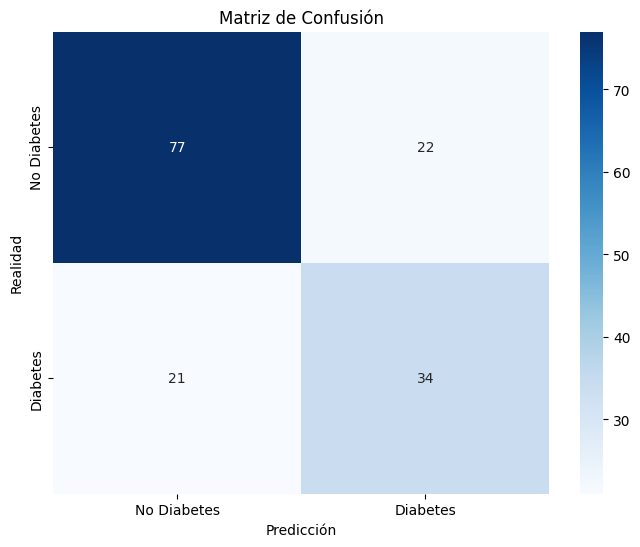

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar la base de datos Pima Indian Diabetes
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

# Separar características y variable objetivo
X = data.drop(columns='Outcome')
y = data['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Mostrar el reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

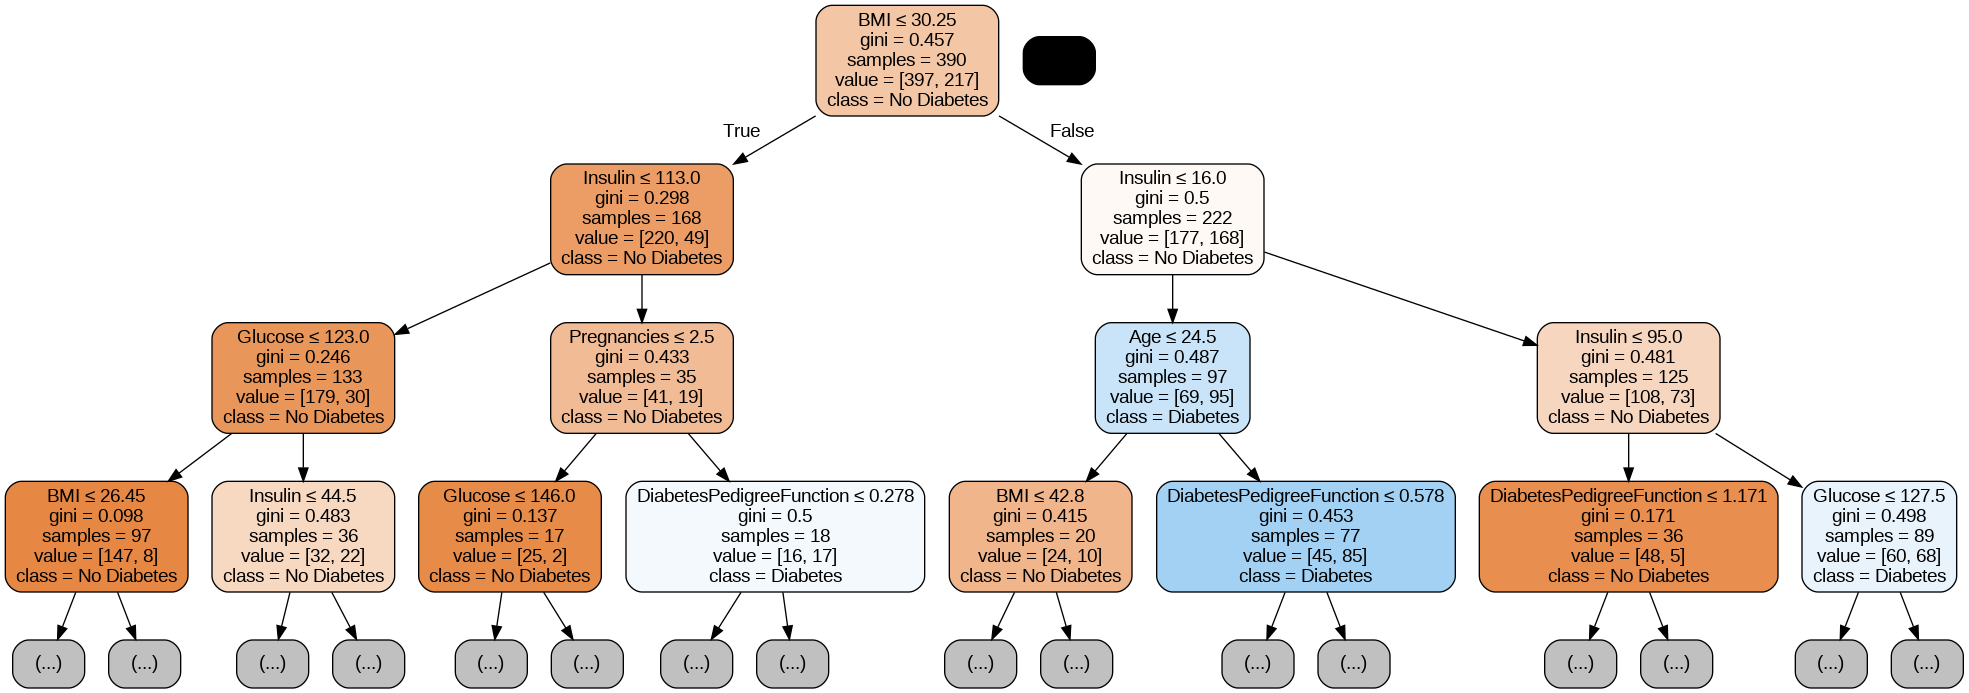

In [4]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Exportar el primer árbol del modelo a formato DOT
dot_data = export_graphviz(model.estimators_[0],
                           feature_names=X.columns,
                           class_names=['No Diabetes', 'Diabetes'],
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           max_depth = 3)

# Crear el gráfico con pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostrar el gráfico en el notebook
Image(graph.create_png())

In [6]:
rf_model = RandomForestClassifier(random_state=42)
# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_features': ['sqrt', 'log2'], # Número de características a considerar para las divisiones
    'max_depth': [None, 10, 20, 30],   # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]      # Número mínimo de muestras requeridas en una hoja
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo optimizado
y_pred = grid_search.predict(X_test)

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(confusion_mat)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores parámetros encontrados:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154


Matriz de Confusión:
[[78 21]
 [17 38]]


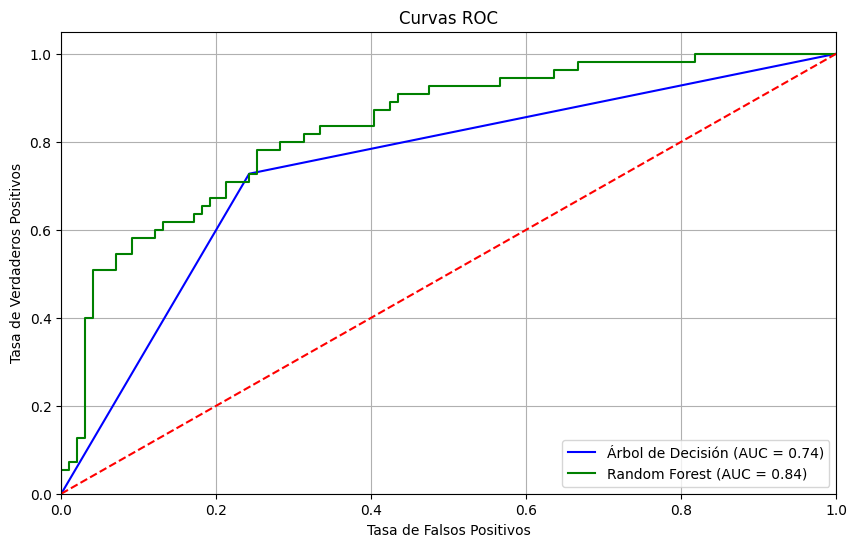

In [15]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Cargar la base de datos Pima Indian Diabetes
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

# Separar características y variable objetivo
X = data.drop(columns='Outcome')
y = data['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir probabilidades
y_score_tree = tree_model.predict_proba(X_test)[:, 1]
y_score_rf = rf_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC para el árbol de decisión
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Calcular la curva ROC y el AUC para el Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, color='blue', label='Árbol de Decisión (AUC = {:.2f})'.format(roc_auc_tree))
plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()
# Predecir probabilidades
y_score_tree = tree_model.predict_proba(X_test)[:, 1]
y_score_rf = rf_model.predict_proba(X_test)[:, 1]

